PRAKTIKUM D1

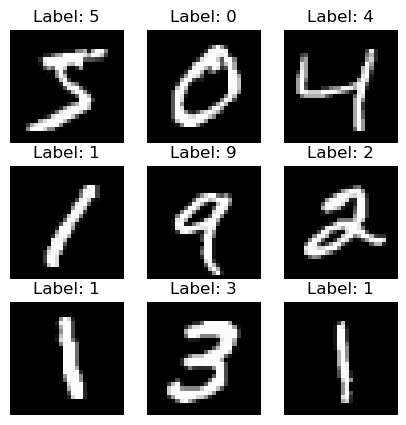

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

#Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#tampilkan data
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')

plt.show()

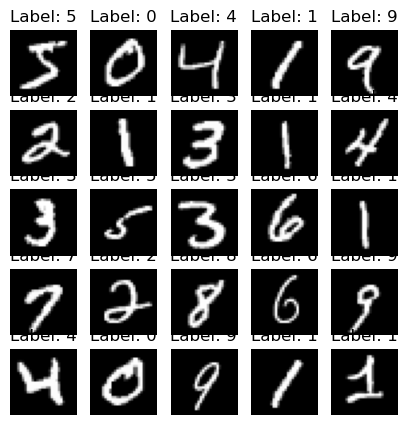

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

#Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#tampilkan data
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')

plt.show()

PRAKTIKUM D2

In [2]:
from sklearn import svm 
from sklearn.metrics import accuracy_score 

# Flatten 
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0 
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM 
clf = svm.SVC(kernel='linear', gamma='scale') 
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM  berat 
y_pred = clf.predict(x_test_flat) 
print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9101


In [8]:
from sklearn import svm 
from sklearn.metrics import accuracy_score 

# Flatten 
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0 
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM 
clf = svm.SVC(kernel='rbf', gamma='scale') 
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM  berat 
y_pred = clf.predict(x_test_flat) 
print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9513


PRAKTIKUM D3

d:\dell backup\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8896 - loss: 0.3634 - val_accuracy: 0.9807 - val_loss: 0.0741
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9796 - loss: 0.0663 - val_accuracy: 0.9855 - val_loss: 0.0500
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9879 - loss: 0.0412 - val_accuracy: 0.9863 - val_loss: 0.0513
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9907 - loss: 0.0280 - val_accuracy: 0.9868 - val_loss: 0.0504
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9938 - loss: 0.0192 - val_accuracy: 0.9862 - val_loss: 0.0518


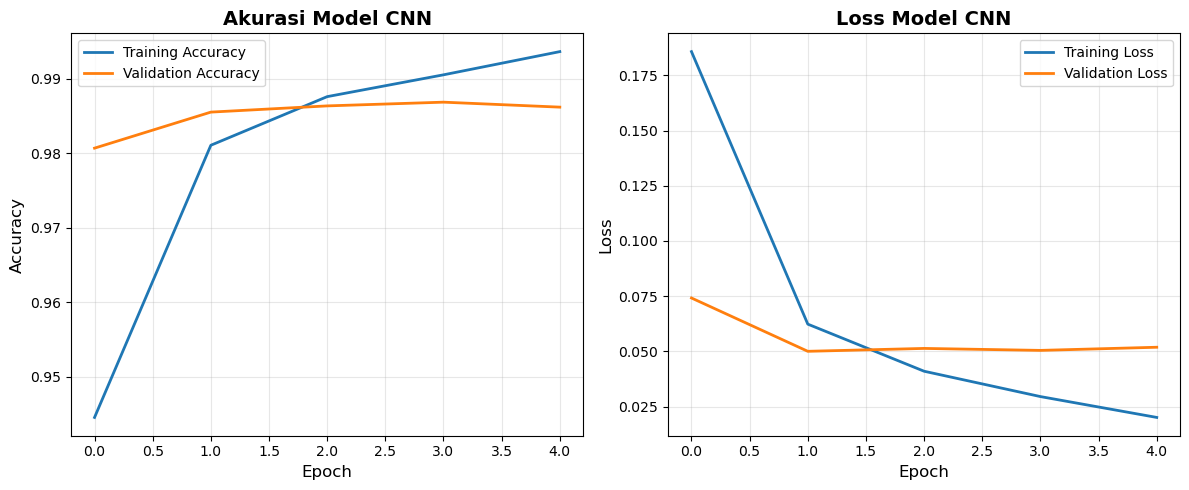


Akurasi pada data testing: 0.9832
Loss pada data testing: 0.0521


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# ===== Persiapan Data =====
# Normalisasi dan reshape data untuk CNN
x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

# ===== Pembuatan Model CNN =====
model = models.Sequential([
    # Layer konvolusi pertama dengan 32 filter
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    
    # Layer pooling untuk reduksi dimensi
    layers.MaxPooling2D((2, 2)),
    
    # Mengubah output 2D menjadi vektor 1D
    layers.Flatten(),
    
    # Layer fully connected
    layers.Dense(64, activation='relu'),
    
    # Layer output dengan 10 neuron (untuk 10 kelas)
    layers.Dense(10, activation='softmax')
])

# ===== Kompilasi Model =====
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ===== Pelatihan Model =====
history = model.fit(
    x_train_cnn, 
    y_train, 
    epochs=5, 
    validation_split=0.1
)

# ===== Visualisasi Hasil Pelatihan =====
plt.figure(figsize=(12, 5))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Akurasi Model CNN', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Loss Model CNN', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ===== Evaluasi Model =====
test_loss, test_acc = model.evaluate(x_test_cnn, y_test, verbose=0)
print(f"\nAkurasi pada data testing: {test_acc:.4f}")
print(f"Loss pada data testing: {test_loss:.4f}")

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9001 - loss: 0.3353 - val_accuracy: 0.9825 - val_loss: 0.0532
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9840 - loss: 0.0534 - val_accuracy: 0.9878 - val_loss: 0.0435
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9897 - loss: 0.0342 - val_accuracy: 0.9897 - val_loss: 0.0360
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9916 - loss: 0.0267 - val_accuracy: 0.9902 - val_loss: 0.0371
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9942 - loss: 0.0184 - val_accuracy: 0.9897 - val_loss: 0.0401


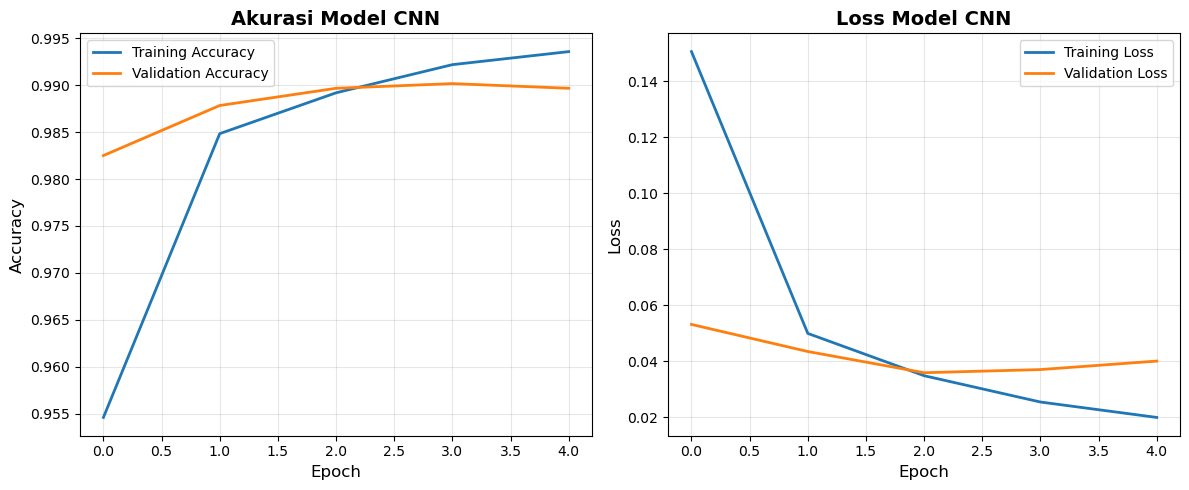


Akurasi pada data testing: 0.9876
Loss pada data testing: 0.0377


In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# ===== Persiapan Data =====
# Normalisasi dan reshape data untuk CNN
x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

# ===== Pembuatan Model CNN =====
model = models.Sequential([
    # Layer konvolusi pertama dengan 32 filter
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    
    # Layer pooling untuk reduksi dimensi
    layers.MaxPooling2D((2, 2)),

    #tambahan layer Conv2D dan MaxPooling2D
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Mengubah output 2D menjadi vektor 1D
    layers.Flatten(),
    
    # Layer fully connected
    layers.Dense(64, activation='relu'),
    
    # Layer output dengan 10 neuron (untuk 10 kelas)
    layers.Dense(10, activation='softmax')
])

# ===== Kompilasi Model =====
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ===== Pelatihan Model =====
history = model.fit(
    x_train_cnn, 
    y_train, 
    epochs=5, 
    validation_split=0.1
)

# ===== Visualisasi Hasil Pelatihan =====
plt.figure(figsize=(12, 5))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Akurasi Model CNN', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Loss Model CNN', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ===== Evaluasi Model =====
test_loss, test_acc = model.evaluate(x_test_cnn, y_test, verbose=0)
print(f"\nAkurasi pada data testing: {test_acc:.4f}")
print(f"Loss pada data testing: {test_loss:.4f}")

PRAKTIKUM D4

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 949s 6us/step
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3786 - loss: 1.7121 - val_accuracy: 0.5532 - val_loss: 1.2482
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5934 - loss: 1.1541 - val_accuracy: 0.6312 - val_loss: 1.0719
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6507 - loss: 0.9977 - val_accuracy: 0.6626 - val_loss: 0.9783
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6830 - loss: 0.9035 - val_accuracy: 0.6848 - val_loss: 0.9247
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7097 - loss: 0.8336 - val_accuracy: 0.6542 - val_loss: 1.0098
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accur

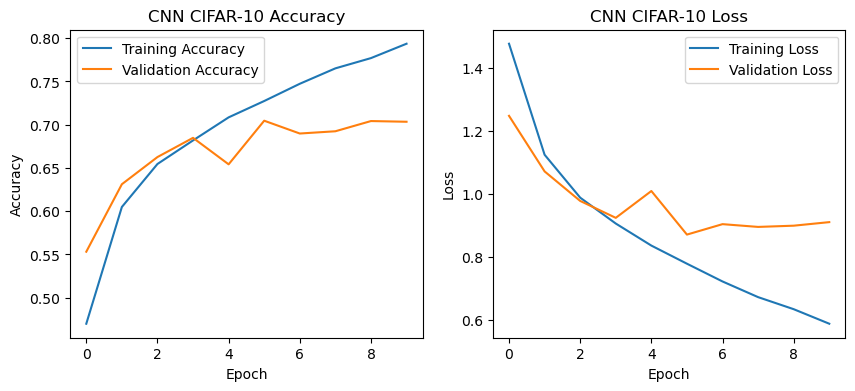

In [4]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# Build model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# Plot history
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

d:\dell backup\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.2750 - loss: 1.9510 - val_accuracy: 0.5006 - val_loss: 1.4005
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.4509 - loss: 1.5206 - val_accuracy: 0.5672 - val_loss: 1.2204
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5068 - loss: 1.3578 - val_accuracy: 0.5974 - val_loss: 1.1494
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.5432 - loss: 1.2732 - val_accuracy: 0.6364 - val_loss: 1.0504
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.5657 - loss: 1.2133 - val_accuracy: 0.6324 - val_loss: 1.0527
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.5818 - loss: 1.1680 - val_accuracy: 0.6450 - val_loss: 1.0052
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6018 - loss: 1.1107 - val_accuracy: 0.6726 - val_loss: 0.9512
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6089 -

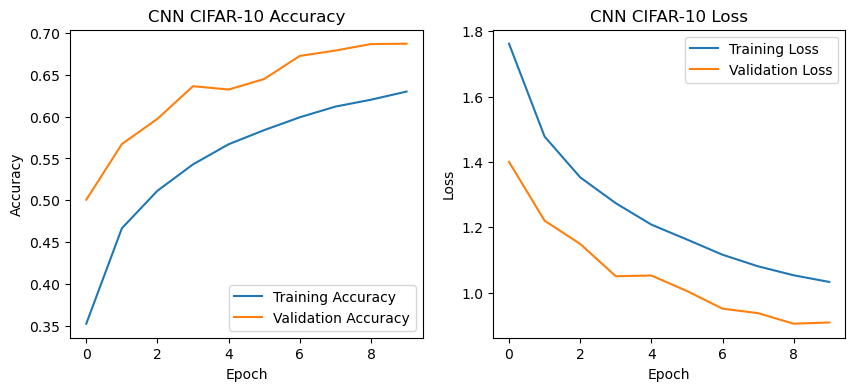

In [5]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# Build model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# Plot history
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

PRAKTIKUM D5

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 204s 145ms/step - accuracy: 0.4581 - loss: 1.5592 - val_accuracy: 0.5804 - val_loss: 1.2103
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 207s 147ms/step - accuracy: 0.5788 - loss: 1.2121 - val_accuracy: 0.5856 - val_loss: 1.1836
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 202s 144ms/step - accuracy: 0.5943 - loss: 1.1535 - val_accuracy: 0.6024 - val_loss: 1.1326
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 226s 161ms/step - accuracy: 0.6171 - loss: 1.1039 - val_accuracy: 0.5910 - val_loss: 1.1612
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 247s 150ms/step - accuracy: 0.6262 - loss: 1.0607 - val_accuracy: 0.6084 - val_loss: 1.1224


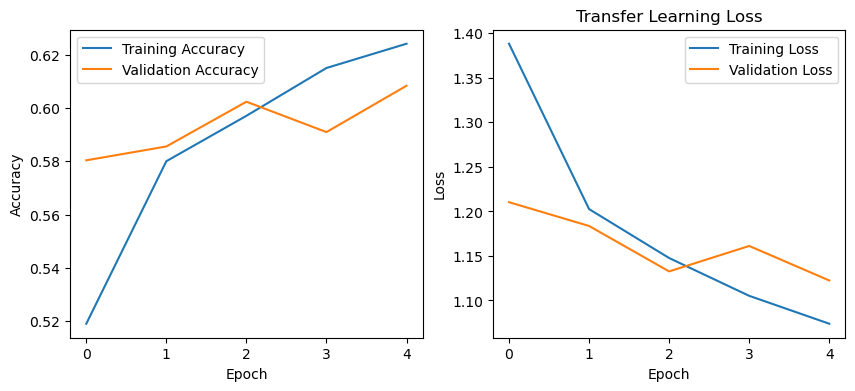

In [7]:
from tensorflow.keras.applications import VGG16 
base_model = VGG16(weights='imagenet', include_top=False,  input_shape=(32,32,3)) 
base_model.trainable = False 
model = models.Sequential([ 
    base_model, 
    layers.Flatten(), 
    layers.Dense(128, activation='relu'), 
    layers.Dense(10, activation='softmax') 
]) 

model.compile(optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=[
        'accuracy'
    ]
)

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1) 

# ===== Plot history ===== 
plt.figure(figsize=(10,4)) 
plt.subplot(1,2,1) 
plt.plot(history.history['accuracy'], label='Training Accuracy') 
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') 
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.legend() 

plt.subplot(1,2,2) 
plt.plot(history.history['loss'], label='Training Loss') 
plt.plot(history.history['val_loss'], label='Validation Loss') 
plt.title('Transfer Learning Loss') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 204s 144ms/step - accuracy: 0.5053 - loss: 1.4130 - val_accuracy: 0.5898 - val_loss: 1.1609
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 215s 153ms/step - accuracy: 0.6282 - loss: 1.0617 - val_accuracy: 0.6416 - val_loss: 1.0194
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 221s 157ms/step - accuracy: 0.6525 - loss: 0.9788 - val_accuracy: 0.6540 - val_loss: 0.9894
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 219s 155ms/step - accuracy: 0.6803 - loss: 0.9139 - val_accuracy: 0.6700 - val_loss: 0.9552
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 227s 161ms/step - accuracy: 0.6866 - loss: 0.8786 - val_accuracy: 0.6606 - val_loss: 0.9758


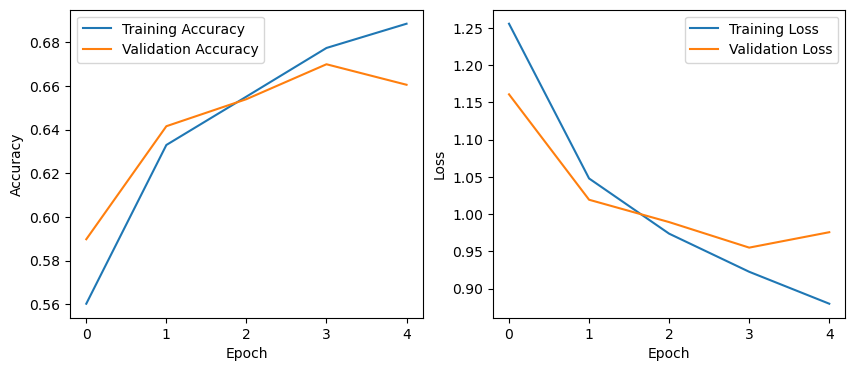

In [8]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# Load base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

# Bekukan semua layer dulu
for layer in base_model.layers:
    layer.trainable = False

# Aktifkan 2 layer terakhir untuk fine-tuning
for layer in base_model.layers[-2:]:
    layer.trainable = True

# Tambahkan classifier di atasnya
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

# Plot Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


PRAKTIKUM D6

313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 128ms/step
              precision    recall  f1-score   support

           0       0.64      0.77      0.70      1000
           1       0.76      0.78      0.77      1000
           2       0.57      0.59      0.58      1000
           3       0.52      0.49      0.50      1000
           4       0.50      0.75      0.60      1000
           5       0.70      0.45      0.55      1000
           6       0.72      0.67      0.69      1000
           7       0.72      0.72      0.72      1000
           8       0.80      0.75      0.77      1000
           9       0.83      0.63      0.71      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



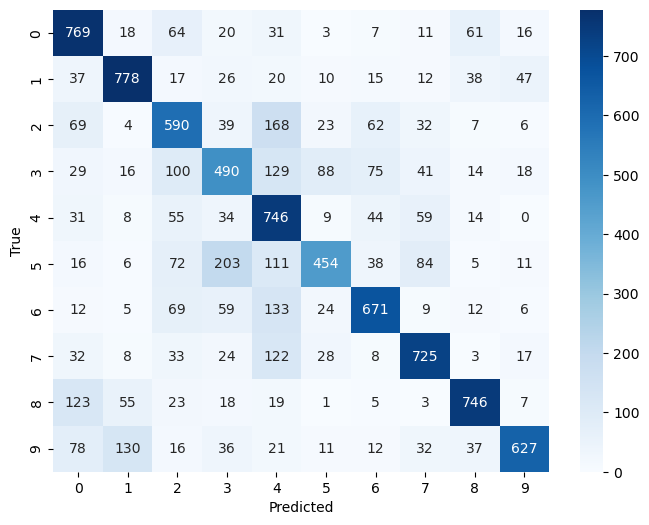

In [10]:
from sklearn.metrics import classification_report, confusion_matrix 
import seaborn as sns 

# Prediksi dan evaluasi
y_pred = model.predict(x_test).argmax(axis=1) 


print(classification_report(y_test, y_pred)) 

cm = confusion_matrix(y_test, y_pred) 
plt.figure(figsize=(8,6)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') 
plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.show()

LATIHAN SOAL

📦 Memuat dataset MNIST...
Shape x_train: (60000, 28, 28)
Shape y_train: (60000,)
Shape x_test: (10000, 28, 28)
Shape y_test: (10000,)
Shape x_train_cnn: (60000, 28, 28, 1)
Shape x_test_cnn: (10000, 28, 28, 1)

📋 Ringkasan Model CNN:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)


🚀 Memulai training model CNN...
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.8366 - loss: 0.5543 - val_accuracy: 0.9812 - val_loss: 0.0621
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9779 - loss: 0.0706 - val_accuracy: 0.9862 - val_loss: 0.0454
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9847 - loss: 0.0497 - val_accuracy: 0.9892 - val_loss: 0.0376
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9881 - loss: 0.0367 - val_accuracy: 0.9895 - val_loss: 0.0380
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9906 - loss: 0.0294 - val_accuracy: 0.9868 - val_loss: 0.0407



💾 Menyimpan model...
✅ Model berhasil disimpan sebagai 'model_cnn.h5'
✅ Model juga disimpan sebagai 'model_cnn.keras'
✅ Weights model disimpan sebagai 'model_cnn.weights.h5'



📊 Akurasi pada data testing: 0.9879
📊 Loss pada data testing: 0.0382

🔍 Memverifikasi model yang disimpan...
✅ Model berhasil dimuat!
✅ Test prediksi: 7 (Actual: 7)
✅ Confidence: 1.000


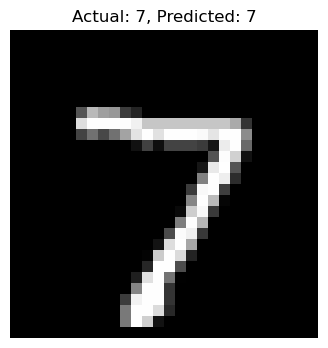

✅ Grafik training disimpan sebagai 'training_history.png'


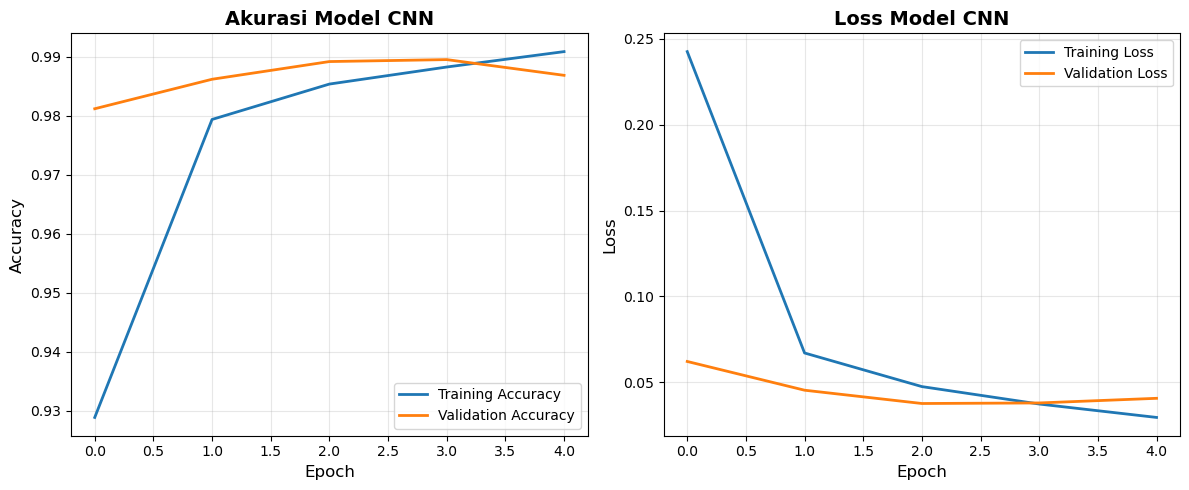


📋 INFORMASI MODEL YANG DISIMPAN
📍 File model: model_cnn.h5
📍 Format: HDF5 (.h5)
📍 Arsitektur: 2x Conv2D + 2x MaxPooling + Dense
📍 Input shape: (28, 28, 1)
📍 Output: 10 classes (0-9)
📍 Jumlah parameter: 121,930
📍 Test accuracy: 0.9879

🧪 Contoh prediksi pada 5 sample test:
✅ Sample 0: Actual=7, Predicted=7, Confidence=1.000
✅ Sample 1: Actual=2, Predicted=2, Confidence=1.000
✅ Sample 2: Actual=1, Predicted=1, Confidence=1.000
✅ Sample 3: Actual=0, Predicted=0, Confidence=1.000
✅ Sample 4: Actual=4, Predicted=4, Confidence=1.000

🔍 Verifikasi weights yang disimpan...
✅ Weights berhasil dimuat ke model baru!
✅ Prediksi model dengan loaded weights: 7
✅ Confidence: 1.000


d:\dell backup\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# ===== LOAD DATASET MNIST =====
print("📦 Memuat dataset MNIST...")
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Shape x_train: {x_train.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape x_test: {x_test.shape}")
print(f"Shape y_test: {y_test.shape}")

# ===== Persiapan Data =====
# Normalisasi dan reshape data untuk CNN
x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

print(f"Shape x_train_cnn: {x_train_cnn.shape}")
print(f"Shape x_test_cnn: {x_test_cnn.shape}")

# ===== Pembuatan Model CNN =====
model = models.Sequential([
    # Layer konvolusi pertama dengan 32 filter
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    
    # Layer pooling untuk reduksi dimensi
    layers.MaxPooling2D((2, 2)),

    # tambahan layer Conv2D dan MaxPooling2D
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Mengubah output 2D menjadi vektor 1D
    layers.Flatten(),
    
    # Layer fully connected
    layers.Dense(64, activation='relu'),
    
    # Layer output dengan 10 neuron (untuk 10 kelas)
    layers.Dense(10, activation='softmax')
])

# ===== Kompilasi Model =====
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Tampilkan ringkasan model
print("\n📋 Ringkasan Model CNN:")
model.summary()

# ===== Pelatihan Model =====
print("\n🚀 Memulai training model CNN...")
history = model.fit(
    x_train_cnn, 
    y_train, 
    epochs=5, 
    validation_split=0.1,
    verbose=1,
    batch_size=128
)

# ===== SIMPAN MODEL =====
print("\n💾 Menyimpan model...")
# Simpan model dalam format .h5
model.save('model_cnn.h5')
print("✅ Model berhasil disimpan sebagai 'model_cnn.h5'")

# Simpan juga dalam format .keras (format modern)
model.save('model_cnn.keras')
print("✅ Model juga disimpan sebagai 'model_cnn.keras'")

# Simpan weights saja (opsional) - PERBAIKAN: gunakan format yang benar
model.save_weights('model_cnn.weights.h5')  # Diubah dari 'model_weights.h5'
print("✅ Weights model disimpan sebagai 'model_cnn.weights.h5'")

# ===== Evaluasi Model =====
test_loss, test_acc = model.evaluate(x_test_cnn, y_test, verbose=0)
print(f"\n📊 Akurasi pada data testing: {test_acc:.4f}")
print(f"📊 Loss pada data testing: {test_loss:.4f}")

# ===== Verifikasi Model yang Disimpan =====
print("\n🔍 Memverifikasi model yang disimpan...")
try:
    # Load model kembali untuk verifikasi
    loaded_model = models.load_model('model_cnn.h5')
    
    # Test prediksi dengan model yang diload
    sample_idx = 0  # Test dengan sample pertama
    sample_image = x_test_cnn[sample_idx:sample_idx+1]
    actual_label = y_test[sample_idx]
    
    prediction = loaded_model.predict(sample_image, verbose=0)
    predicted_digit = np.argmax(prediction[0])
    
    print(f"✅ Model berhasil dimuat!")
    print(f"✅ Test prediksi: {predicted_digit} (Actual: {actual_label})")
    print(f"✅ Confidence: {np.max(prediction[0]):.3f}")
    
    # Tampilkan gambar sample
    plt.figure(figsize=(4, 4))
    plt.imshow(x_test[sample_idx], cmap='gray')
    plt.title(f'Actual: {actual_label}, Predicted: {predicted_digit}')
    plt.axis('off')
    plt.show()
    
except Exception as e:
    print(f"❌ Error dalam verifikasi: {e}")

# ===== Visualisasi Hasil Pelatihan =====
plt.figure(figsize=(12, 5))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Akurasi Model CNN', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Loss Model CNN', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_history.png')  # Simpan gambar juga
print("✅ Grafik training disimpan sebagai 'training_history.png'")
plt.show()

# ===== Informasi Model =====
print("\n" + "="*50)
print("📋 INFORMASI MODEL YANG DISIMPAN")
print("="*50)
print(f"📍 File model: model_cnn.h5")
print(f"📍 Format: HDF5 (.h5)")
print(f"📍 Arsitektur: 2x Conv2D + 2x MaxPooling + Dense")
print(f"📍 Input shape: (28, 28, 1)")
print(f"📍 Output: 10 classes (0-9)")
print(f"📍 Jumlah parameter: {model.count_params():,}")
print(f"📍 Test accuracy: {test_acc:.4f}")
print("="*50)

# ===== Contoh Prediksi pada Beberapa Sample =====
print("\n🧪 Contoh prediksi pada 5 sample test:")
for i in range(5):
    sample_img = x_test_cnn[i:i+1]
    actual = y_test[i]
    prediction = model.predict(sample_img, verbose=0)
    predicted = np.argmax(prediction[0])
    confidence = np.max(prediction[0])
    
    status = "✅" if predicted == actual else "❌"
    print(f"{status} Sample {i}: Actual={actual}, Predicted={predicted}, Confidence={confidence:.3f}")

# ===== VERIFIKASI WEIGHTS YANG DISIMPAN =====
print("\n🔍 Verifikasi weights yang disimpan...")
try:
    # Buat model baru dengan arsitektur yang sama
    new_model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    
    # Compile model baru
    new_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])
    
    # Load weights yang disimpan
    new_model.load_weights('model_cnn.weights.h5')
    print("✅ Weights berhasil dimuat ke model baru!")
    
    # Test prediksi dengan model baru
    sample_img = x_test_cnn[0:1]
    prediction_new = new_model.predict(sample_img, verbose=0)
    predicted_new = np.argmax(prediction_new[0])
    
    print(f"✅ Prediksi model dengan loaded weights: {predicted_new}")
    print(f"✅ Confidence: {np.max(prediction_new[0]):.3f}")
    
except Exception as e:
    print(f"❌ Error dalam verifikasi weights: {e}")